<a href="https://colab.research.google.com/github/tal7aouy/food-vision/blob/main/custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
torch.__version__

'2.1.0+cu121'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Check if the image folder exists
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Corrected URL (ensure this URL directly points to the zip file)
    file_url = "https://github.com/tal7aouy/food-vision/blob/main/data/pizza_steak_sushi.zip?raw=true"

    # Download pizza, steak, sushi data
    print("Downloading pizza, steak, sushi data...")
    with requests.get(file_url, stream=True) as r:
        r.raise_for_status()
        with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)


Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [5]:
import os
def walk_throught_folder(dir_path):
  for dirpath,dirnames, filenames,  in os.walk(dir_path):
    print(f"{dirpath}, {dirnames}, {filenames}")

walk_throught_folder(image_path)

data/pizza_steak_sushi, ['train', 'test'], []
data/pizza_steak_sushi/train, ['steak', 'sushi', 'pizza'], []
data/pizza_steak_sushi/train/steak, [], ['482022.jpg', '1849463.jpg', '225990.jpg', '239025.jpg', '1976160.jpg', '3727036.jpg', '2614649.jpg', '1761285.jpg', '165639.jpg', '2561199.jpg', '3727491.jpg', '2087958.jpg', '1961025.jpg', '1382427.jpg', '1225762.jpg', '421476.jpg', '2017387.jpg', '461689.jpg', '1413972.jpg', '2222018.jpg', '1937872.jpg', '3577618.jpg', '2287136.jpg', '1966300.jpg', '3245622.jpg', '167069.jpg', '1264154.jpg', '97656.jpg', '2603058.jpg', '3074367.jpg', '234626.jpg', '1736968.jpg', '560503.jpg', '3857508.jpg', '2614189.jpg', '2979061.jpg', '75537.jpg', '1598345.jpg', '2324994.jpg', '3142674.jpg', '914570.jpg', '2606444.jpg', '1624747.jpg', '2881783.jpg', '2628106.jpg', '231296.jpg', '214320.jpg', '937133.jpg', '176508.jpg', '830007.jpg', '2013535.jpg', '3518960.jpg', '1615395.jpg', '2129685.jpg', '735441.jpg', '339891.jpg', '2707522.jpg', '2648423.jpg', '2

In [6]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/steak/2648423.jpg
Image class: steak
Image height: 512
Image width: 512


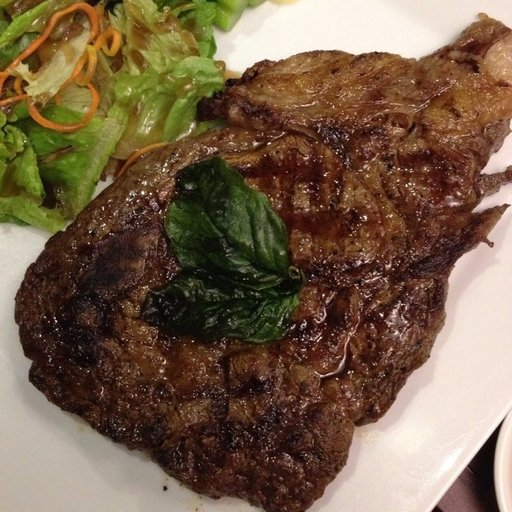

In [11]:
import random
from PIL import Image

# Set seed
random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

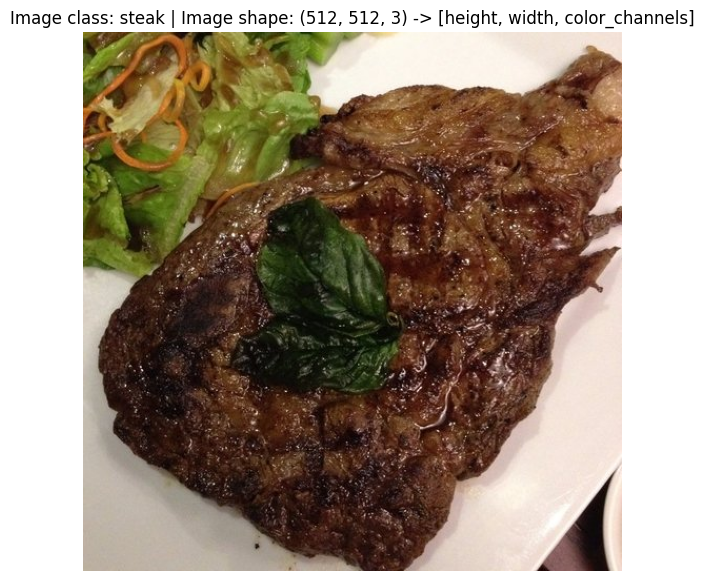

In [12]:
# You can do the same using matplotlib
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

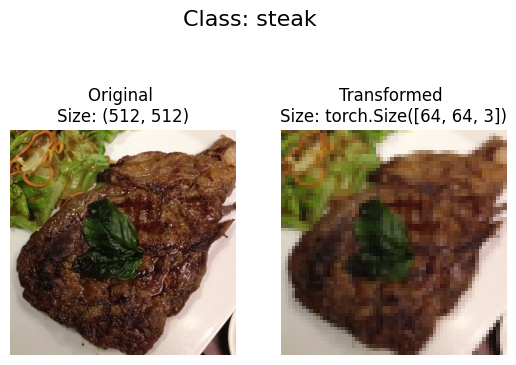

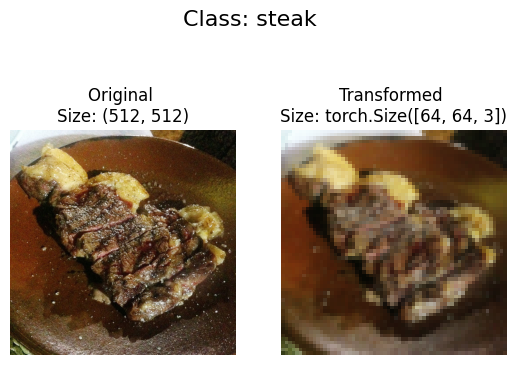

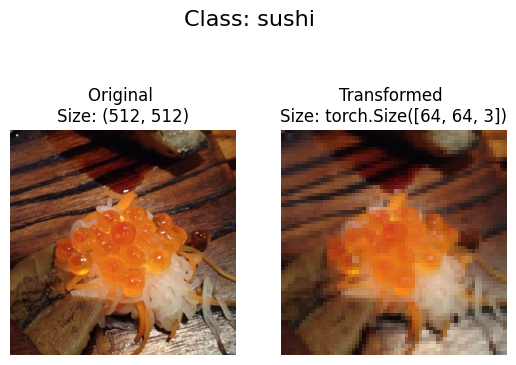

In [15]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)